## A brief review

## Activation Functions

Linear:  $$g(z) = z$$ 

Unit step: $$g(z) = \begin{cases} 0 & z < 0, \\ 1 & z \ge 0 \end{cases}$$

logistic (sigmoid): $$g(z) = \frac{1}{1 + e^{-z}}$$

hyperbolic tangent (sigmoid): $$g(z) = tanh(z) = \frac{e^{z}-e^{-z}}{e^{z}+e^{-z}}$$


Piecewise linear: $$g(z) = \begin{cases}
 1 & \mbox{for } z \geq \frac{1}{2} \\
 z + \frac{1}{2} & \mbox{for } -\frac{1}{2} < z < \frac{1}{2} \\
 0 & \mbox{for } z \leq -\frac{1}{2}
 \end{cases}$$

In [2]:
import numpy as np
def activation(z, kind):
    
    implemented = ('linear', 'unit step', 'logistic', 'piecewise linear', 'tanh')
    if kind not in implemented:
        raise AttributeError('%s not in %s' % (kind, implemented))
    
    if kind == 'unit step':
        return np.where(z >= 0.0, 1, 0)
    
    elif kind == 'logistic':
        return 1.0 / (1.0 + np.exp(-z))
    
    elif kind == 'tanh':
        e_p = np.exp(z) 
        e_m = np.exp(-z)
        return (e_p - e_m) / (e_p + e_m)  
    
    elif kind == 'piecewise linear':
        if z >= 0.5:
            return 1
        elif z <= -0.5:
            return 0
        else:
            return z + 0.5
        
    else:
        return z

In [3]:
import matplotlib.pyplot as plt
%matplotlib inline

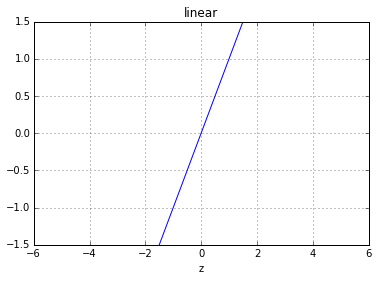

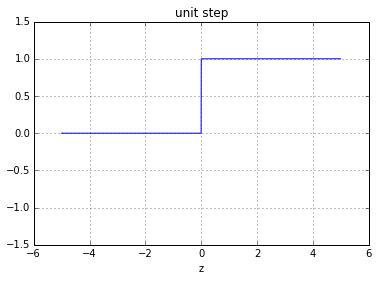

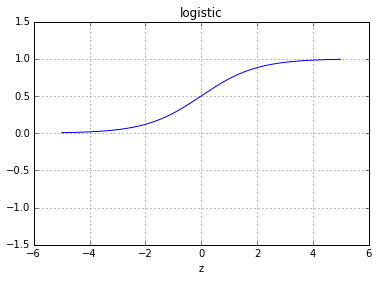

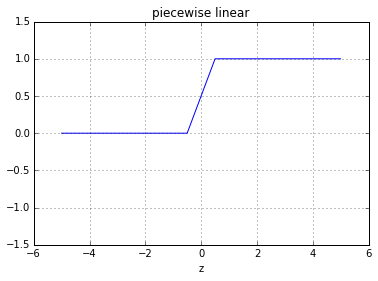

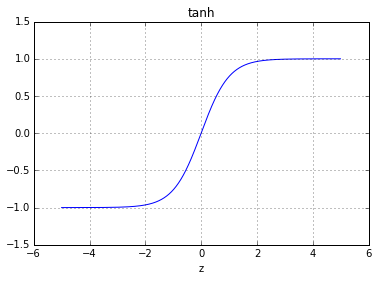

In [4]:
x = np.arange(-5, 5, 0.005)
for a in ('linear', 'unit step', 'logistic', 'piecewise linear', 'tanh'):
    y = [activation(z, kind=a) for z in x]
    plt.plot(x, y)
    plt.title(a)
    plt.ylim([-1.5, 1.5])
    plt.xlabel('z')
    plt.grid()
    plt.show()

## Loss functions

##  Max-margin
$$ L_i = \sum_{j\neq y_i} \max(0, f_j - f_{y_i} + 1) $$

## Softmax
$$ L_i = -\log\left(\frac{e^{f_{y_i}}}{ \sum_j e^{f_j} }\right) $$

## Regression

$$ L_i = \Vert f - y_i \Vert_2^2 $$


$$ L_i = \Vert f - y_i \Vert_1 = \sum_j \mid f_j - (y_i)_j \mid $$

## Overfitting

How do we decide on what architecture to use when faced with a practical problem? Should we use no hidden layers? One hidden layer? Two hidden layers? How large should each layer be? First, note that as we increase the size and number of layers in a Neural Network, the capcacity of the network increases. That is, the space of representable functions grows since the neurons can collaborate to express many different functions. For example, suppose we had a binary classification problem in two dimensions. We could train three separate neural networks, each with one hidden layer of some size and obtain the following classifiers:

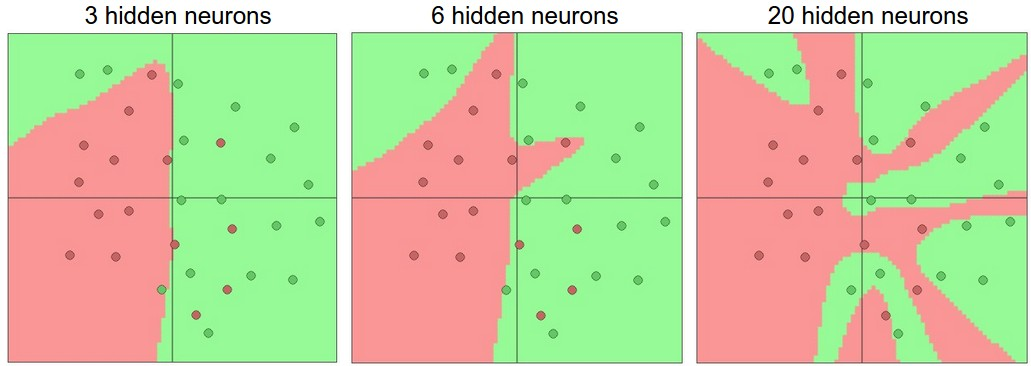

In [2]:
from IPython.display import Image
Image('layer_sizes.jpeg')

## Regularization


To prevent overfitting , we add a penatly to the cost function.  For example in $L2$ Regularization,for every weight $w$ in the network, we add the term $\frac{1}{2} \lambda w^2$ to the objective, where $λ$ is the regularization strength.

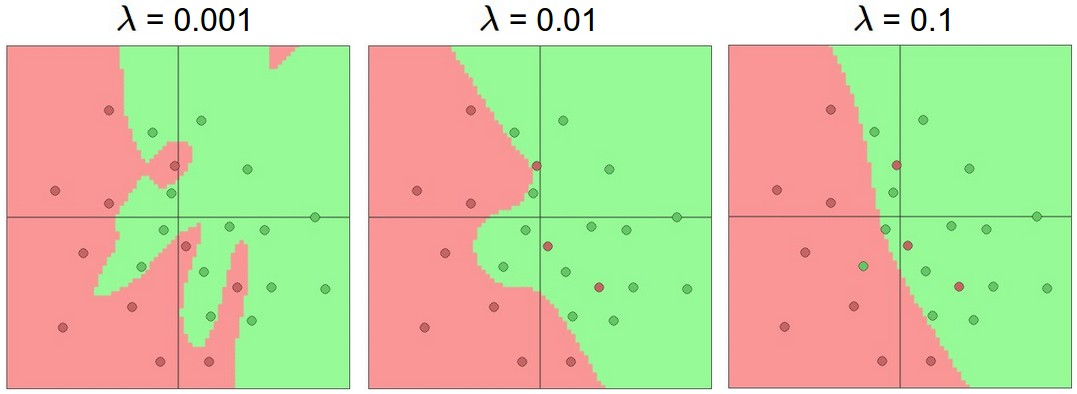

In [3]:
Image('reg_strengths.jpeg')

## The learning box

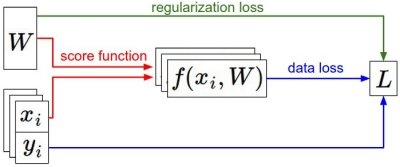

In [5]:
Image('dataflow.jpeg')

Summary of the information flow. The dataset of pairs of (x,y) is given and fixed. The weights start out as random numbers and can change. During the forward pass the score function computes class scores, stored in vector f. The loss function contains two components: The data loss computes the compatibility between the scores f and the labels y. The regularization loss is only a function of the weights. During Gradient Descent, we compute the gradient on the weights (and optionally on data if we wish) and use them to perform a parameter update during Gradient Descent.